In [16]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import random

In [17]:
df= pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data", header= None)

In [18]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [19]:
df.describe()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [20]:
dfnew=df.loc[1:5876,:]

In [21]:
samples = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(dfnew.iloc[:, 1:], dfnew.iloc[:,0 ], test_size=0.3)
    samples.append((X_train, X_test, y_train, y_test))

In [22]:
X_train

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
4790,4,8,5,6,2,3,1,7,9,0,1,3,0,7,1,5
212,6,10,8,7,5,8,6,3,10,12,4,9,1,7,6,9
2259,8,10,9,8,6,1,10,3,3,11,11,9,7,10,1,7
5536,1,3,2,2,1,10,6,2,5,12,4,9,0,7,0,7
834,1,3,3,1,1,9,8,3,4,10,3,5,4,8,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5446,5,10,5,7,3,3,8,6,11,7,6,15,0,8,7,7
3163,6,10,8,7,5,6,9,3,10,12,9,7,1,9,6,6
4357,2,7,3,5,3,8,8,8,6,8,4,6,2,6,8,8
2810,2,5,3,3,2,8,12,3,6,6,11,7,2,11,1,7


In [23]:
y_train

4790    L
212     Z
2259    W
5536    J
834     N
       ..
5446    E
3163    Z
4357    S
2810    T
2699    Q
Name: 0, Length: 4113, dtype: object

In [24]:
samples

[(      1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16
  59     5  10   6   8   5   9   3   2   6   9   2   9   2   5   3   9
  79     3   5   4   4   2   7   8   5   4   7   7   7   6   9   2   5
  1803   7  11   7   8   5   8   7   8   5  10   6   8   3   8   3   8
  5625   7  12   6   6   4   8   3   4   3   7   4   4   4   7   5   8
  5648   4   7   6   5   4   7   9   6   5   7   6   6   6   9   1   6
  ...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
  802    7  15   7   8   5   9   3   4   4  12   7  11   4   8   7   9
  54     4   9   5   6   4   7   8   7   7   8   4   7   2   7   9   8
  4904   2   5   3   4   2   6   8   7   7   9   8  13   1   9   4  10
  2684   6   9   9   8  11   7   7   5   4   8   6   8   7   9   8   7
  2230   3   7   5   5   5   5   6   3   4   6   5   9   5   7   8   7
  
  [4113 rows x 16 columns],
        1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16
  364    4   7   5   5   2   5   7  10   9   7

In [25]:
  def fitnessfunction(X_train, X_test, y_train, y_test, kernel, c, gamma):
    model= svm.SVC( C= c, kernel= kernel, gamma=gamma)
    model.fit(X_train, y_train)
    print("fit")
    predicted = model.predict(X_test)
        
    # Model Evaluation Accuracy
    accuracy = round(np.mean(y_test == predicted) * 100, 2)
    return accuracy 

In [26]:
# divide dataset into training and testing sets with 10 different samples


nsamples = 10
accuracies = []
params= []
iteration= 100

kernelList = ['rbf', 'sigmoid']
df_sample= pd.DataFrame(columns=['sample#', 'best accuracy', 'c', 'gamma', 'kernel'])

for i in range(nsamples):
    bestC = 0 
    bestGamma = 0 
    bestAccuracy=0
    X_train, X_test, y_train, y_test = samples[i]
    
    print("Iterating on sample ", i+1)
    for j in range(1, iteration+1):
        print("iteration ",j)
        kernel= np.random.choice(kernelList)
        C = np.random.uniform(0,10)
        gamma = np.random.uniform(0, 10)
        print(kernel , C, gamma)
        accuracy= fitnessfunction(X_train, X_test, y_train, y_test, kernel, C, gamma)
        if accuracy > bestAccuracy:
                bestAccuracy = accuracy
                bestC= C
                bestGamma= gamma
                bestKernel= kernel

                    
    accuracies.append(bestAccuracy)
    params.append([bestC, bestGamma, bestKernel])

    df_sample.loc[len(df_sample.index)] = [i+1, bestAccuracy, bestC, bestGamma, bestKernel]
    #print(f"Sample {i+1}: Best accuracy = {bestAccuracy}, Best params = {bestNu, bestEpsilon, bestKernel}")
print("Done iterating!\n")


Iterating on sample  1
iteration  1
rbf 9.379320692722661 1.5141276836759143
fit
iteration  2
rbf 7.7575532512814585 9.885962262807153
fit
iteration  3
sigmoid 0.021916870073843686 9.324879410694688
fit
iteration  4
rbf 7.4363775758805435 7.680933101706752
fit
iteration  5
rbf 8.748358259482963 3.5536501002089658
fit
iteration  6
rbf 3.3874788756397276 3.895244332026846
fit
iteration  7
rbf 4.310688911353107 1.1877262592813942
fit
iteration  8
rbf 9.666909864770798 6.974594626105879
fit
iteration  9
sigmoid 4.573653992085578 0.40654393083932816
fit
iteration  10
sigmoid 9.631692351672449 7.373689242139092
fit
iteration  11
rbf 0.9501624851749857 6.098867392191193
fit
iteration  12
rbf 8.78710376821724 5.570839301218239
fit
iteration  13
sigmoid 5.53997047138978 9.567924046582943
fit
iteration  14
sigmoid 8.183445386215954 3.0235209797666904
fit
iteration  15
sigmoid 3.1341537335748226 6.3579427180723505
fit
iteration  16
sigmoid 7.81012139580694 3.0304201288145505
fit
iteration  17
rbf

In [27]:
print(df_sample)

   sample#  best accuracy         c     gamma kernel
0        1          53.37  1.564118  0.510824    rbf
1        2          89.45  4.917960  0.145474    rbf
2        3          35.73  1.132102  0.848974    rbf
3        4          93.76  7.327410  0.076770    rbf
4        5          31.20  6.798255  0.854750    rbf
5        6          50.82  9.496406  0.495739    rbf
6        7          93.02  1.974726  0.082835    rbf
7        8          92.91  6.502445  0.090752    rbf
8        9          93.36  8.332252  0.070639    rbf
9       10          77.20  1.554407  0.273996    rbf


In [28]:
X_train, X_test, y_train, y_test = samples[df_sample['best accuracy'].idxmax()]

In [29]:
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC


train_sizes, train_scores, test_scores = learning_curve(SVC(kernel=df_sample['kernel'].iloc[df_sample['best accuracy'].idxmax()], 
                                                        C=df_sample['c'].iloc[df_sample['best accuracy'].idxmax()],
                                                        gamma=df_sample['gamma'].iloc[df_sample['best accuracy'].idxmax()],
                                                        max_iter = 1000), X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1,
                                                        train_sizes = np.linspace(0.01, 1.0, 50))


In [30]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

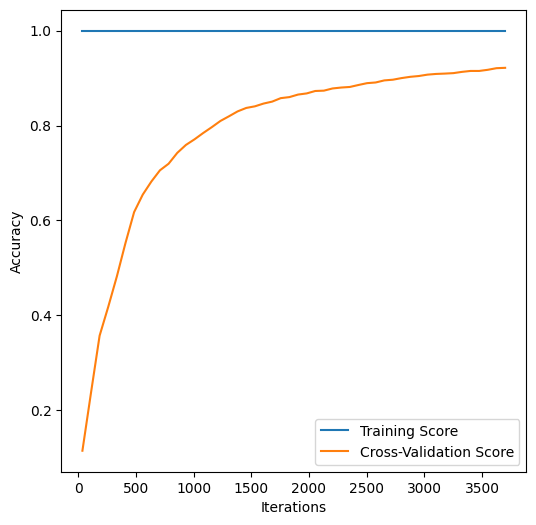

In [31]:
plt.figure(figsize=(6, 6))
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend(loc="best")
plt.show()